In [10]:
import cv2
import os
import glob
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#reading images and putting them into d ,, then reshaping d (44,10304)

img_dir = "./ATT"  # Enter Directory of all images
data_path = os.path.join(img_dir, '*g')
files = glob.glob(data_path)
data = []
i=0
for f1 in files:
    i=i+1
    img = cv2.imread(f1)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    data.append(gray)
    mydata = np.array(data)
##Data shape->400*10304
d=np.reshape(mydata, (400, 10304))
print("Shape od D matrix :",d.shape)


Shape od D matrix : (400, 10304)


In [7]:

# assiging labels
labels = []
personN=1
for i in range(1,401):

    person= str(personN)
    labels.append(person)
    z=i%10
    if z<1:
        # print("**IF**",personN)
        personN = personN +1

# print(labels)

data = pd.DataFrame(data=d)
data['labels'] = labels
# data.iloc[[0]]

#splitting the data
X = data.drop('labels',axis = 1)

i_train=0
i_test=0
train_split_value = int(d.shape[0]*(5/10))
test_split_value = d.shape[0] - train_split_value
    
X_train = np.zeros((train_split_value,10304))
y_train = np.zeros((train_split_value,1)) 
    
X_test = np.zeros((test_split_value,10304))
y_test = np.zeros((test_split_value,1))

for i in range(400):
    if i%2==0:
        X_test[i_test,:] = X.iloc[i]
        y_test[i_test] = labels[i]
        i_test+=1
        #odd
    
    else:
        X_train[i_train,:] = X.iloc[i]
        y_train[i_train] = labels[i]
        i_train+=1
        

train_data = pd.DataFrame(data = X_train)
train_data['labels'] = y_train

test_data = pd.DataFrame(data = X_test)
test_data['labels'] = y_test

In [9]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,10295,10296,10297,10298,10299,10300,10301,10302,10303,labels
0,140.0,134.0,135.0,136.0,133.0,136.0,133.0,134.0,136.0,137.0,...,18.0,18.0,21.0,15.0,21.0,21.0,25.0,26.0,49.0,1.0
1,138.0,135.0,135.0,138.0,136.0,135.0,135.0,136.0,135.0,136.0,...,16.0,21.0,15.0,15.0,21.0,16.0,23.0,18.0,35.0,1.0
2,132.0,118.0,124.0,129.0,133.0,138.0,135.0,132.0,142.0,126.0,...,27.0,26.0,53.0,66.0,61.0,65.0,56.0,67.0,62.0,1.0
3,133.0,135.0,135.0,136.0,133.0,135.0,132.0,133.0,134.0,136.0,...,30.0,24.0,25.0,25.0,24.0,15.0,18.0,17.0,15.0,1.0
4,135.0,133.0,136.0,136.0,136.0,132.0,137.0,134.0,132.0,137.0,...,20.0,17.0,15.0,16.0,18.0,16.0,18.0,21.0,24.0,1.0
5,48.0,46.0,49.0,46.0,48.0,46.0,51.0,46.0,48.0,49.0,...,26.0,38.0,25.0,30.0,31.0,31.0,31.0,31.0,36.0,2.0
6,44.0,48.0,45.0,47.0,48.0,46.0,46.0,50.0,50.0,49.0,...,194.0,216.0,104.0,16.0,30.0,33.0,33.0,36.0,37.0,2.0
7,48.0,45.0,45.0,48.0,45.0,50.0,52.0,47.0,53.0,44.0,...,93.0,9.0,26.0,29.0,27.0,30.0,28.0,37.0,29.0,2.0
8,45.0,49.0,47.0,47.0,52.0,44.0,47.0,45.0,54.0,48.0,...,28.0,31.0,33.0,32.0,31.0,32.0,40.0,30.0,44.0,2.0
9,47.0,49.0,46.0,47.0,51.0,47.0,51.0,47.0,52.0,48.0,...,31.0,26.0,26.0,28.0,28.0,26.0,31.0,32.0,34.0,2.0


In [11]:
from numpy import linalg as LA 

data = train_data
mu_all = [np.mean(data[col]) for col in data.columns[:-1]]
labels = data.labels.unique()
mu= []  
l =0
#means
for i in labels:
    means=[]
    for col in data.columns[:-1]:
        means.append(np.mean(data[data['labels'] == i][col]))
    mu.append(means)
print('mus',len(mu),len(mu[0]))

# b 
i =0
b = np.zeros((10304,10304))
for i in range(40):
    mat_diff = np.reshape(np.subtract(mu[i],mu_all),(10304,1))
    b = np.add(b,5*np.matmul(mat_diff,np.transpose(mat_diff)))
print('shape of b',b.shape)

mus 40 10304
shape of b (10304, 10304)


In [12]:
b

array([[229647.755, 229781.255, 225540.865, ..., -18199.55 , -22264.895,
        -18137.32 ],
       [229781.255, 230657.555, 226154.165, ..., -18978.15 , -23072.795,
        -18861.12 ],
       [225540.865, 226154.165, 222227.795, ..., -19050.65 , -22795.485,
        -18884.76 ],
       ...,
       [-18199.55 , -18978.15 , -19050.65 , ..., 310058.7  , 313472.75 ,
        311491.6  ],
       [-22264.895, -23072.795, -22795.485, ..., 313472.75 , 321528.355,
        317164.88 ],
       [-18137.32 , -18861.12 , -18884.76 , ..., 311491.6  , 317164.88 ,
        319319.68 ]])

In [13]:
b.shape

(10304, 10304)

In [14]:
z = []
for i in range(40):

    d = data[data['labels'] == labels[i]]
    d = d.drop('labels',axis=1)

    class_mean = np.reshape(mu[i],(10304,1))
    mean_by_ones_transpose =np.matmul(np.ones((5,1)),np.transpose(class_mean))
    z.append(np.subtract(d,mean_by_ones_transpose))

#s[i] and S
S = np.zeros((10304,10304))
for i in range(40):
    mat = np.array(z[i])
    output = np.matmul(np.transpose(mat),mat)
    S = np.add(S,output)
print('shape of S',S.shape)

shape of S (10304, 10304)


In [15]:
E_Values_LDA , E_Vectors_LDA  = LA.eigh(np.matmul(LA.inv(S),b))
idx = E_Values_LDA.argsort()[::-1]##
E_Values_Sorted = E_Values_LDA[idx]
E_Vectors_Sorted = E_Vectors_LDA[:,idx]
projMatrix = E_Vectors_Sorted[:,:39]  # first 39 columns 
print(projMatrix.shape)

#projected data

U_Train_LDA_projection = train_data.drop('labels',axis=1).dot(projMatrix)
U_Test_LDA_projection = test_data.drop('labels',axis=1).dot(projMatrix)

print('U_Train_LDA_projection',U_Train_LDA_projection.shape)
print('U_Test_LDA_projection',U_Test_LDA_projection.shape)


(10304, 39)
U_Train_LDA_projection (200, 39)
U_Test_LDA_projection (200, 39)


(200, 39)
(200, 1)
(200, 39)
(200, 1)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


[0]Classified as: 1.0 Actual is: [1.]
[1]Classified as: 1.0 Actual is: [1.]
[2]Classified as: 1.0 Actual is: [1.]
[3]Classified as: 1.0 Actual is: [1.]
[4]Classified as: 1.0 Actual is: [1.]
[5]Classified as: 2.0 Actual is: [2.]
[6]Classified as: 2.0 Actual is: [2.]
[7]Classified as: 2.0 Actual is: [2.]
[8]Classified as: 2.0 Actual is: [2.]
[9]Classified as: 2.0 Actual is: [2.]
[10]Classified as: 3.0 Actual is: [3.]
[11]Classified as: 3.0 Actual is: [3.]
[12]Classified as: 3.0 Actual is: [3.]
[13]Classified as: 3.0 Actual is: [3.]
[14]Classified as: 3.0 Actual is: [3.]
[15]Classified as: 4.0 Actual is: [4.]
[16]Classified as: 4.0 Actual is: [4.]
[17]Classified as: 4.0 Actual is: [4.]
[18]Classified as: 4.0 Actual is: [4.]
[19]Classified as: 4.0 Actual is: [4.]
[20]Classified as: 5.0 Actual is: [5.]
[21]Classified as: 5.0 Actual is: [5.]
[22]Classified as: 5.0 Actual is: [5.]
[23]Classified as: 5.0 Actual is: [5.]
[24]Classified as: 5.0 Actual is: [5.]
[25]Classified as: 6.0 Actual is: [

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


[47]Classified as: 10.0 Actual is: [10.]
[48]Classified as: 10.0 Actual is: [10.]
[49]Classified as: 10.0 Actual is: [10.]
[50]Classified as: 7.0 Actual is: [11.]
[51]Classified as: 11.0 Actual is: [11.]
[52]Classified as: 11.0 Actual is: [11.]
[53]Classified as: 11.0 Actual is: [11.]
[54]Classified as: 11.0 Actual is: [11.]
[55]Classified as: 12.0 Actual is: [12.]
[56]Classified as: 12.0 Actual is: [12.]
[57]Classified as: 21.0 Actual is: [12.]
[58]Classified as: 21.0 Actual is: [12.]
[59]Classified as: 12.0 Actual is: [12.]
[60]Classified as: 13.0 Actual is: [13.]
[61]Classified as: 13.0 Actual is: [13.]
[62]Classified as: 13.0 Actual is: [13.]
[63]Classified as: 13.0 Actual is: [13.]
[64]Classified as: 13.0 Actual is: [13.]
[65]Classified as: 14.0 Actual is: [14.]
[66]Classified as: 14.0 Actual is: [14.]
[67]Classified as: 14.0 Actual is: [14.]
[68]Classified as: 14.0 Actual is: [14.]
[69]Classified as: 14.0 Actual is: [14.]
[70]Classified as: 15.0 Actual is: [15.]
[71]Classified as

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


[180]Classified as: 37.0 Actual is: [37.]
[181]Classified as: 37.0 Actual is: [37.]
[182]Classified as: 37.0 Actual is: [37.]
[183]Classified as: 37.0 Actual is: [37.]
[184]Classified as: 37.0 Actual is: [37.]
[185]Classified as: 38.0 Actual is: [38.]
[186]Classified as: 38.0 Actual is: [38.]
[187]Classified as: 38.0 Actual is: [38.]
[188]Classified as: 38.0 Actual is: [38.]
[189]Classified as: 38.0 Actual is: [38.]
[190]Classified as: 39.0 Actual is: [39.]
[191]Classified as: 39.0 Actual is: [39.]
[192]Classified as: 39.0 Actual is: [39.]
[193]Classified as: 39.0 Actual is: [39.]
[194]Classified as: 39.0 Actual is: [39.]
[195]Classified as: 40.0 Actual is: [40.]
[196]Classified as: 40.0 Actual is: [40.]
[197]Classified as: 40.0 Actual is: [40.]
[198]Classified as: 40.0 Actual is: [40.]
[199]Classified as: 40.0 Actual is: [40.]
[0]Classified as: 1.0 Actual is: [1.]
[1]Classified as: 1.0 Actual is: [1.]
[2]Classified as: 1.0 Actual is: [1.]
[3]Classified as: 1.0 Actual is: [1.]
[4]Class

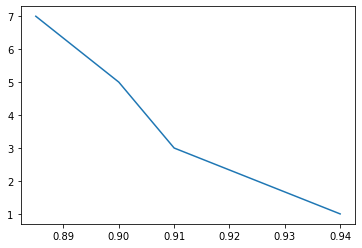

In [16]:
def Knn(train_data,train_label,test_data,test_label):
    best_n  = [1,3,5,7]
    score = []
    
    train_label = np.reshape(np.array(train_label),(200,1))
    test_label = np.reshape(np.array(test_label),(200,1))
    print(train_data.shape)
    print(train_label.shape)
    print(test_data.shape)
    print(test_label.shape)
    
    for i,neighbour in zip(range(len(best_n )),best_n ):
        KnnTest = KNeighborsClassifier(n_neighbors = neighbour, weights = 'distance') 
        
        KnnTest.fit(train_data, train_label) 
        
        pred = KnnTest.predict(test_data)
        
        score.append(accuracy_score(pred,test_label)) 
        
        count = 0
        for i in range(len(pred)):
            print("[" + str(i) + "]" + "Classified as: "+ str(pred[i]) +" Actual is: "+ str(test_label[i]))
            
    print("Number of Misclassified is " + str(count))
    plt.plot(score,best_n)
    plt.show()



Knn(U_Train_LDA_projection,train_data['labels'],U_Test_LDA_projection,test_data['labels'])